Dataset Shape: (2972, 12)

Columns: Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin', 'style',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote',
       'image'],
      dtype='object')

Summary Statistics:
             overall verified   reviewTime      reviewerID        asin  \
count   2972.000000     2972         2972            2972        2972   
unique          NaN        2          797             458         148   
top             NaN     True  12 14, 2017  A1U1G73EI5IRZF  B00AR51Y5I   
freq            NaN     2838           23              32          94   
mean       4.885262      NaN          NaN             NaN         NaN   
std        0.484660      NaN          NaN             NaN         NaN   
min        1.000000      NaN          NaN             NaN         NaN   
25%        5.000000      NaN          NaN             NaN         NaN   
50%        5.000000      NaN          NaN             NaN         NaN   
75%        5.000000     

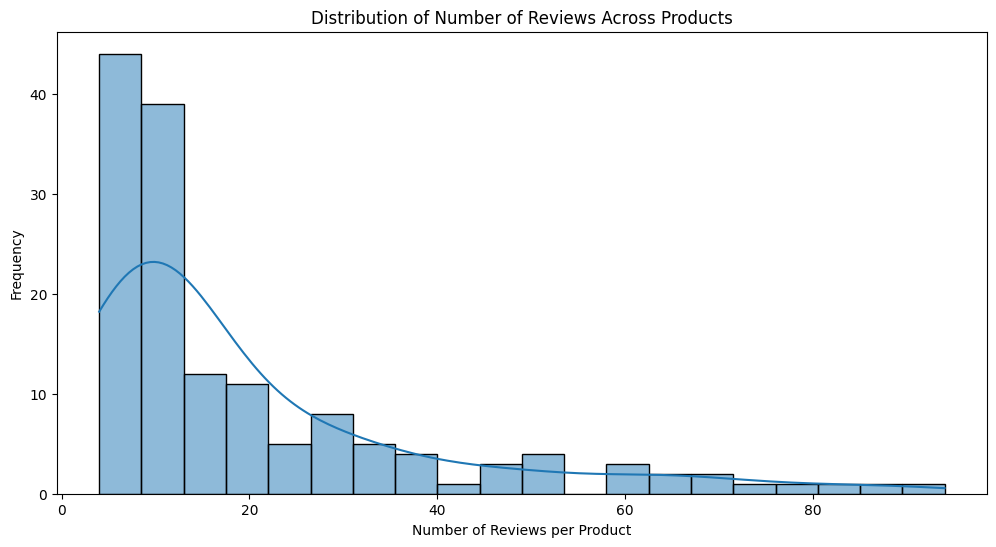

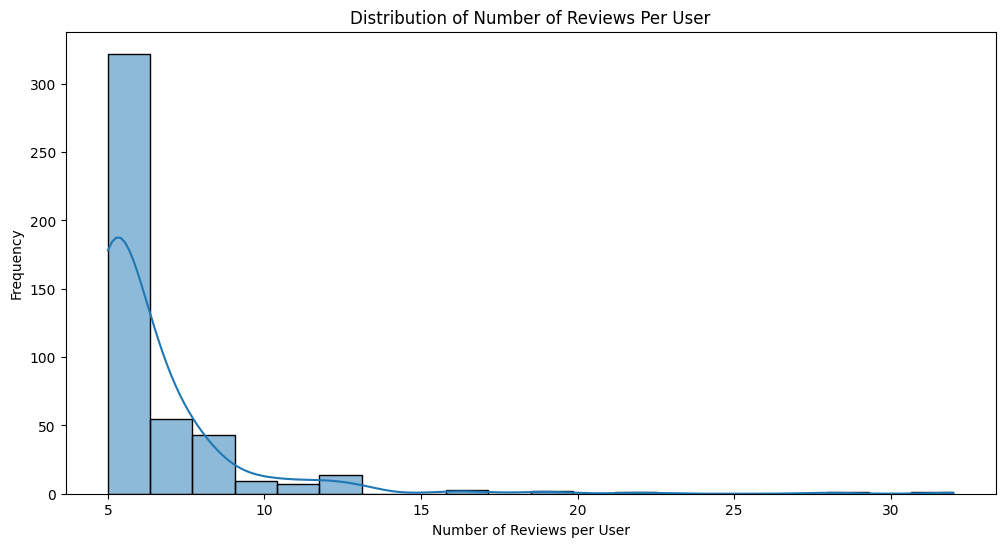

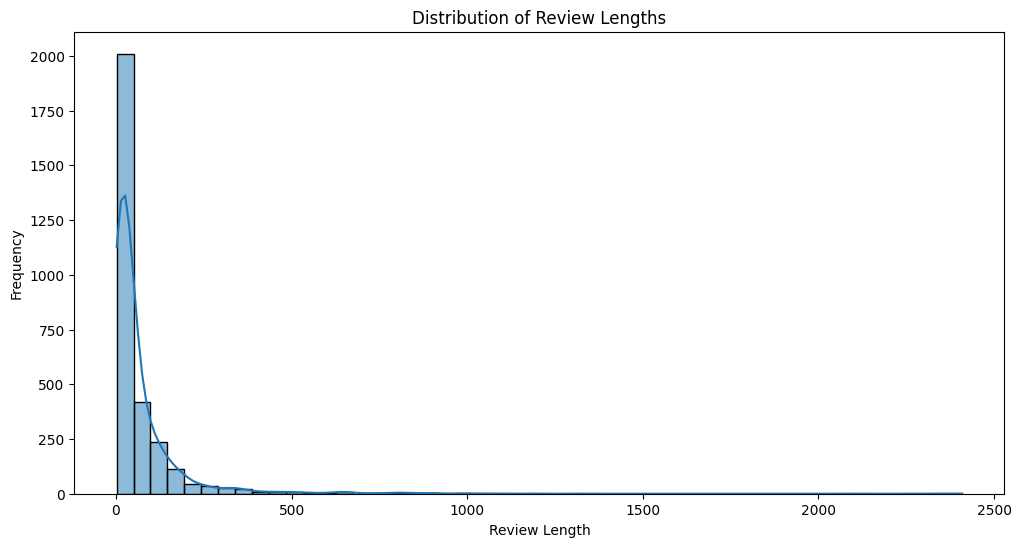


Duplicate Reviews Count: 1330

Sample Duplicate Reviews:
     overall  verified   reviewTime      reviewerID        asin  \
6       5.0      True   05 1, 2018  A34JP8QRZRS7W5  B004LLIKVU   
13      4.0      True  04 14, 2018  A3R3UC3SWC7RIL  B004Q7CK9M   
14      5.0      True  03 18, 2018   AEGP5NUG8YFS0  B004Q7CK9M   
15      5.0      True  03 18, 2018  A3BNRL2SCE6CGU  B004Q7CK9M   
19      5.0      True   03 1, 2018  A28YGUP7ZFI6PP  B004Q7CK9M   

                      style reviewerName                       reviewText  \
6   {'Gift Amount:': ' 50'}         dood                            great   
13  {'Gift Amount:': ' 30'}           KC                         was gift   
14  {'Gift Amount:': ' 20'}     Wanda K.                            great   
15  {'Gift Amount:': ' 15'}  karl zahler              they are gift cards   
19  {'Gift Amount:': ' 25'}         Cath  Xmas stocking stuffer. Loved it   

         summary  unixReviewTime vote image  review_length  
6          great    

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter

# Load the dataset
file_path = "/content/Gift_Cards_5.json"  # Update this path if needed
with open(file_path, 'r') as f:
    data = [json.loads(line) for line in f]

# Convert to DataFrame
df = pd.DataFrame(data)

# Display basic information
print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns)

# Display basic statistics
print("\nSummary Statistics:\n", df.describe(include="all"))

# Check missing values
print("\nMissing Values:\n", df.isnull().sum())

# Count the number of reviews per product (asin)
product_review_counts = df['asin'].value_counts()

# Plot distribution of reviews across products
plt.figure(figsize=(12, 6))
sns.histplot(product_review_counts, bins=20, kde=True)
plt.title("Distribution of Number of Reviews Across Products")
plt.xlabel("Number of Reviews per Product")
plt.ylabel("Frequency")
plt.show()

# Count the number of reviews per user
user_review_counts = df['reviewerID'].value_counts()

# Plot distribution of reviews per user
plt.figure(figsize=(12, 6))
sns.histplot(user_review_counts, bins=20, kde=True)
plt.title("Distribution of Number of Reviews Per User")
plt.xlabel("Number of Reviews per User")
plt.ylabel("Frequency")
plt.show()

# Analyze review text length
df["review_length"] = df["reviewText"].astype(str).apply(len)

# Plot distribution of review lengths
plt.figure(figsize=(12, 6))
sns.histplot(df["review_length"], bins=50, kde=True)
plt.title("Distribution of Review Lengths")
plt.xlabel("Review Length")
plt.ylabel("Frequency")
plt.show()

# Detect duplicates based on review text
duplicate_reviews = df[df.duplicated(subset=["reviewText"], keep=False)]
print("\nDuplicate Reviews Count:", duplicate_reviews.shape[0])

# Display some duplicate reviews
if not duplicate_reviews.empty:
    print("\nSample Duplicate Reviews:\n", duplicate_reviews.head())

print("\nAnalysis Completed.")


In [3]:
df.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,review_length
0,5.0,True,"06 17, 2018",A31UBHTUUIFJUT,B004LLIKVU,{'Gift Amount:': ' 50'},john stoiber,Another great gift.,Five Stars,1529193600,NaN,NaN,19
1,4.0,True,"06 14, 2018",A2MN5JQMIY0FQ2,B004LLIKVU,{'Gift Amount:': ' 50'},Amazon Customer,Gift card for my daughter,Ease of use,1528934400,NaN,NaN,25
2,5.0,True,"06 2, 2018",A25POI5IGGENPM,B004LLIKVU,{'Gift Amount:': ' 50'},Kindle Customer,Nice present,Five Stars,1527897600,NaN,NaN,12
3,5.0,True,"05 19, 2018",A2HYGTHB4LJ9FW,B004LLIKVU,{'Gift Amount:': ' 50'},Amante dei Gatti,My niece loved this birthday greeting/gift card.,Love the convenience of eCards,1526688000,NaN,NaN,48
4,5.0,True,"05 18, 2018",ACDG3M94UMZGJ,B004LLIKVU,{'Gift Amount:': ' 50'},Joan Freesh,fine as a gift.,Five Stars,1526601600,NaN,NaN,15
